# IMDB Sentiment Classification with Keras NN with BatchNormalization

Import libraries

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers

### Import dataset

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\marek\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\marek\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

Data shape

In [3]:
print("train_data :", train_data.shape)
print("train_target : ", train_target.shape)
print("\ntest_data ", test_data.shape)
print("test_target ", test_target.shape)

train_data : (25000,)
train_target :  (25000,)

test_data  (25000,)
test_target  (25000,)


Data statistics

In [4]:
print("Categories:", np.unique(train_target))
length = [len(i) for i in train_data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))
print("Maximum value of a word index: ", max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train :", max([len(sequence) for sequence in train_data]))   

Categories: [0 1]
Average Review length: 238.71364
Standard Deviation: 176
Maximum value of a word index:  9999
Maximum length num words of review in train : 2494


Representation of data

In [5]:
print("Label:", train_target[0])

Label: 1


In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


See actual review in words

In [7]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in train_data[1]] )
print(decoded) 

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal # the hair is big lots of boobs # men wear those cut # shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


### Data preparation

Encoding integer sequence into binary matrix using one hot encoder

From integers which represents words to normalised one hot encoded tensor (matrix) of 10 thousand columns

In [8]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 
x_train = vectorize(train_data)
y_train = np.array(train_target).astype("float32")
x_test = vectorize(test_data)
y_test = np.array(test_target).astype("float32")

In [9]:
print(x_test[0].size)

10000


In [10]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential()
# Input layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model.add(BatchNormalization(epsilon=0.001))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
# Hidden layers
model.add(BatchNormalization(epsilon=0.001))
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))

model.add(BatchNormalization(epsilon=0.001))
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002),  activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))

model.add(BatchNormalization(epsilon=0.001))
model.add(layers.Dense(25,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003),  activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))

# Output layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500050    
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                2

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
train_history = model.fit(
 x_train, y_train,
 epochs= 100,
 batch_size = 250,
 validation_data = (x_test, y_test),
 callbacks = [EarlyStopping(monitor='loss', patience=3)]
)

Epoch 1/100
100/100 [==============================] - 5s 23ms/step - loss: 1.4855 - accuracy: 0.7038 - val_loss: 1.2861 - val_accuracy: 0.8638
Epoch 2/100
100/100 [==============================] - 1s 15ms/step - loss: 0.9925 - accuracy: 0.8910 - val_loss: 0.9487 - val_accuracy: 0.8793
Epoch 3/100
100/100 [==============================] - 1s 15ms/step - loss: 0.7032 - accuracy: 0.9250 - val_loss: 0.7184 - val_accuracy: 0.8704
Epoch 4/100
100/100 [==============================] - 1s 15ms/step - loss: 0.4792 - accuracy: 0.9484 - val_loss: 0.6009 - val_accuracy: 0.8532
Epoch 5/100
100/100 [==============================] - 2s 16ms/step - loss: 0.3251 - accuracy: 0.9619 - val_loss: 0.4892 - val_accuracy: 0.8651
Epoch 6/100
100/100 [==============================] - 2s 16ms/step - loss: 0.2290 - accuracy: 0.9690 - val_loss: 0.4568 - val_accuracy: 0.8573
Epoch 7/100
100/100 [==============================] - 1s 15ms/step - loss: 0.1804 - accuracy: 0.9727 - val_loss: 0.4271 - val_accuracy:

In [12]:
results = model.evaluate(x_test, y_test, verbose=1)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.6241 - accuracy: 0.8595


[0.6241327524185181, 0.8594800233840942]

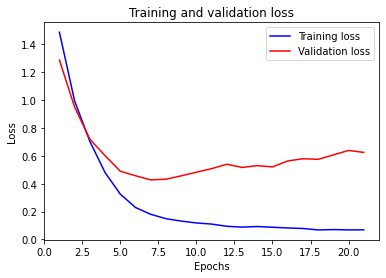

In [13]:
import matplotlib.pyplot as plt

loss_values = train_history.history["loss"]
validation_loss_val = train_history.history["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

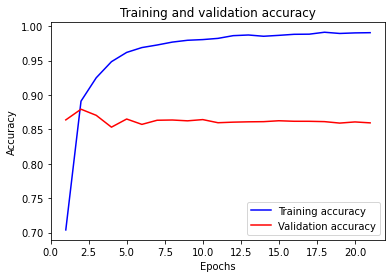

In [14]:
train_acc = train_history.history['accuracy']
validation_acc = train_history.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
train_history = model.fit(
 x_train, y_train,
 epochs= 100,
 batch_size = 100,
 validation_data = (x_test, y_test),
 callbacks = [EarlyStopping(monitor='loss', patience=3)]
)

Epoch 1/100
250/250 [==============================] - 5s 16ms/step - loss: 0.0949 - accuracy: 0.9830 - val_loss: 0.6049 - val_accuracy: 0.8587
Epoch 2/100
250/250 [==============================] - 4s 15ms/step - loss: 0.1034 - accuracy: 0.9806 - val_loss: 0.5463 - val_accuracy: 0.8576
Epoch 3/100
250/250 [==============================] - 3s 14ms/step - loss: 0.0936 - accuracy: 0.9817 - val_loss: 0.5467 - val_accuracy: 0.8561
Epoch 4/100
250/250 [==============================] - 3s 14ms/step - loss: 0.0921 - accuracy: 0.9819 - val_loss: 0.5431 - val_accuracy: 0.8577
Epoch 5/100
250/250 [==============================] - 3s 14ms/step - loss: 0.0870 - accuracy: 0.9838 - val_loss: 0.5709 - val_accuracy: 0.8564
Epoch 6/100
250/250 [==============================] - 3s 14ms/step - loss: 0.0841 - accuracy: 0.9850 - val_loss: 0.5857 - val_accuracy: 0.8563
Epoch 7/100
250/250 [==============================] - 3s 14ms/step - loss: 0.0782 - accuracy: 0.9872 - val_loss: 0.5769 - val_accuracy:

In [16]:
results = model.evaluate(x_test, y_test, verbose=1)
results

782/782 [==============================] - 3s 4ms/step - loss: 0.6567 - accuracy: 0.8602


[0.6566827297210693, 0.8601599931716919]

In [17]:
model = models.Sequential()
# Input layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
# Hidden layers
model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(BatchNormalization(epsilon=0.001))

model.add(layers.Dense(50,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002),  activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(BatchNormalization(epsilon=0.001))

model.add(layers.Dense(25,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003),  activation = "relu"))
model.add(BatchNormalization(epsilon=0.001))

# Output layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 50)                200       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)               

In [18]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
train_history = model.fit(
 x_train, y_train,
 epochs= 100,
 batch_size = 125,
 validation_data = (x_test, y_test),
 callbacks = [EarlyStopping(monitor='loss', patience=3)]
)

Epoch 1/100
200/200 [==============================] - 4s 13ms/step - loss: 1.3968 - accuracy: 0.7548 - val_loss: 1.1262 - val_accuracy: 0.8744
Epoch 2/100
200/200 [==============================] - 2s 12ms/step - loss: 0.8536 - accuracy: 0.8956 - val_loss: 0.7585 - val_accuracy: 0.8773
Epoch 3/100
200/200 [==============================] - 2s 12ms/step - loss: 0.5297 - accuracy: 0.9337 - val_loss: 0.5620 - val_accuracy: 0.8684
Epoch 4/100
200/200 [==============================] - 2s 12ms/step - loss: 0.3260 - accuracy: 0.9506 - val_loss: 0.4393 - val_accuracy: 0.8715
Epoch 5/100
200/200 [==============================] - 2s 12ms/step - loss: 0.2139 - accuracy: 0.9611 - val_loss: 0.4307 - val_accuracy: 0.8624
Epoch 6/100
200/200 [==============================] - 2s 10ms/step - loss: 0.1596 - accuracy: 0.9676 - val_loss: 0.3852 - val_accuracy: 0.8660
Epoch 7/100
200/200 [==============================] - 2s 11ms/step - loss: 0.1230 - accuracy: 0.9730 - val_loss: 0.4093 - val_accuracy:

In [19]:
results = model.evaluate(x_test, y_test, verbose=1)
results

782/782 [==============================] - 4s 4ms/step - loss: 0.6438 - accuracy: 0.8664


[0.6437543630599976, 0.8664000034332275]

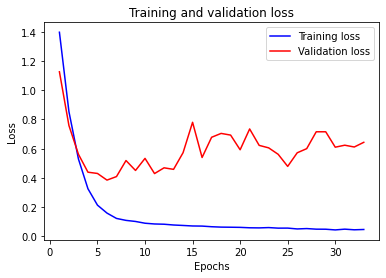

In [20]:
loss_values = train_history.history["loss"]
validation_loss_val = train_history.history["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

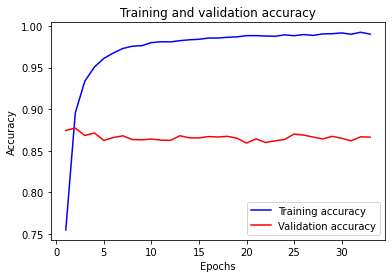

In [21]:
train_acc = train_history.history['accuracy']
validation_acc = train_history.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Conclusions

Received results with different batch size, batch normalization before and after apply activation funtion seems to not have influence on results on test dataset results.
Models have aproximately 86% accuracy on test dataset.

Results are simlar to achived in laboratory 6. 

